## **SC1015 Mini Project - A Study on Stroke and Factors Causing it**

Examine the trend of factors causing stroke and predicting the likelihood of a patient getting stroke
>
>
>
**Project Team 2**
>
>
**Team members:**
- Yeoh Yu Shyan
- Douglas Toh 
- Ivan Ong Guan Kai
>

**Date:**

DAY MONTH 2022


# **Section 1: Problem Statement / Research Topic**

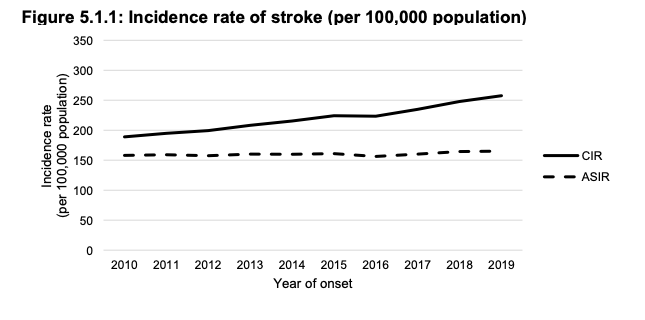

**Problem Statement:**
With reference to the [article](https://www.nrdo.gov.sg/docs/librariesprovider3/default-document-library/ssr-annual-report-2019.pdf?sfvrsn=594314c4_0), it has been noticed that the growth rate of stroke has been increasing at an alarming rate in Singapore, although stroke has been known to be [hereditary](https://www.hopkinsmedicine.org/health/conditions-and-diseases/stroke/risk-factors-for-stroke), our group believes that there exist various other factors that place an individual at higher risk of getting Stroke.
>
>
>
**Project Objective:**
This project will evaluate which are the highest factors that contributes to stroke itself.
>>

## **DATASET EVALUATION**
> 
*   [Kaggle.com](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)
>
> Factors affecting Stroke such as:
>
>> * Gender
>>
>> * Age
>>
>> * Hypertension
>>
>> * History of Hearth Disease
>>
>> * Marriage status
>>
>> * Work Type
>>
>> * Residence Typr
>>
>> * Average Glucose Level
>>
>> * BMI
>>
>> * Smoking Status
>
>  Data are collected from the websites as mentioned above, filtered and cleaned.

# **Libraries Imported**

In [49]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# For dataframes and statistical analysis
import pandas as pd
import numpy as np

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt

# For analysis of dataset
import math
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import log_loss
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as rf_classifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV as gridCV
from sklearn.tree import DecisionTreeClassifier as dtree_clf
from sklearn.ensemble import AdaBoostClassifier as adaboost_clf
from sklearn import tree
from imblearn.over_sampling import SMOTE

# For GoogleCollab
from google.colab import files
uploaded = files.upload()


Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (1).csv


# **Section 2: Dataset and Data Preparation**

# **Insights:**
**As analyzed below, we can conclude that the dataset consists of:**
>
  * 11 Columns 
  >
  >> Categorical: 8 Variables
  >>
  >> Numerical: 3 Variables
  >
  * Datatype consists of Float, Objects & Integers
  >
  * 5110 Rows Of Data
  >
  * No null values for all columns except one [BMI].
  >
  > BMI column consist of 201 instances being considered as not applicable based on the table below and that equates to about 201/5110 = 4% of the whole data with missing bmi values

  * And 1 intance of gender labeled 'others'

In [ ]:
s_dataframe=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [ ]:
s_dataframe.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
s_dataframe.shape

(5110, 12)

In [ ]:
s_dataframe.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [48]:
for x in ['gender','hypertension','heart_disease','ever_married','work_type',
          'Residence_type','smoking_status','stroke']:
    print(s_dataframe[x].value_counts(),"\n")

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64 

0    4612
1     498
Name: hypertension, dtype: int64 

0    4834
1     276
Name: heart_disease, dtype: int64 

Yes    3353
No     1757
Name: ever_married, dtype: int64 

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64 

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64 

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64 

0    4861
1     249
Name: stroke, dtype: int64 



## **Data cleaning**
>
From the data set we search for any missing values and discover about 201 bmi without values


In [43]:
s_dataframe.isna().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [32]:
notapplicable=[]
for i in range(0,len(s_dataframe.columns)):
    notapplicable.append(s_dataframe[s_dataframe.columns[i]].isna().sum())
    
na_dataframe=pd.DataFrame(zip(s_dataframe.columns,notapplicable))
na_dataframe.columns=["Variable","Counts (NotApplicable)"]

na_dataframe

,Variable,Counts (NotApplicable)
0,id,0
1,gender,0
2,age,0
3,hypertension,0
4,heart_disease,0
5,ever_married,0
6,work_type,0
7,Residence_type,0
8,avg_glucose_level,0
9,bmi,201


In [33]:
Bmi=s_dataframe.loc[s_dataframe['bmi'].isna()]
Bmi.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,201.000000,201.000000,201.000000,201.000000,201.000000,0.0,201.000000
mean,23171.109453,52.049154,0.233831,0.164179,126.724627,NaN,0.199005
std,20882.483120,22.276181,0.424323,0.371363,59.240322,NaN,0.400249
min,67.000000,0.480000,0.000000,0.000000,57.520000,NaN,0.000000
25%,4062.000000,37.000000,0.000000,0.000000,81.430000,NaN,0.000000
50%,18234.000000,58.000000,0.000000,0.000000,99.870000,NaN,0.000000
75%,37937.000000,71.000000,0.000000,0.000000,191.790000,NaN,0.000000
max,72231.000000,82.000000,1.000000,1.000000,260.850000,NaN,1.000000


In [35]:
s_dataframe2 = s_dataframe.copy()
s_dataframe2.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [36]:
Male= s_dataframe.loc[s_dataframe['gender']=="Male"]['bmi']
Female = s_dataframe.loc[s_dataframe['gender']=="Female"]['bmi']
print(Male.describe(),"\n")
print(Female.describe(),"\n")

count    2011.000000
mean       28.647936
std         7.464493
min        11.500000
25%        24.000000
50%        28.400000
75%        32.500000
max        97.600000
Name: bmi, dtype: float64 

count    2897.000000
mean       29.065758
std         8.110783
min        10.300000
25%        23.400000
50%        27.800000
75%        33.500000
max        78.000000
Name: bmi, dtype: float64 



In [37]:
s_dataframe2.loc[s_dataframe2['gender']=="Male",'bmi']=s_dataframe2.loc[s_dataframe2['gender']=="Male"]['bmi'].fillna(28.4)
s_dataframe2.loc[s_dataframe2['gender']=="Female",'bmi']=s_dataframe2.loc[s_dataframe2['gender']=="Female"]['bmi'].fillna(27.8)

In [38]:
print(s_dataframe2.loc[s_dataframe2['gender']=="Male"]['bmi'].describe(),"\n")
print(s_dataframe2.loc[s_dataframe2['gender']=="Female"]['bmi'].describe(),"\n")

count    2115.000000
mean       28.635745
std         7.278764
min        11.500000
25%        24.250000
50%        28.400000
75%        32.200000
max        97.600000
Name: bmi, dtype: float64 

count    2994.000000
mean       29.024749
std         7.981418
min        10.300000
25%        23.425000
50%        27.800000
75%        33.300000
max        78.000000
Name: bmi, dtype: float64 



## **Following which,** 
Additionally, there is only 1 instance with the gender categorized as "others" hence its better to remove the instance.

In [41]:
s_dataframe2 = s_dataframe2.loc[s_dataframe2["gender"]!="Other"]
s_dataframe2['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [42]:
s_dataframe2['bmi'].isna().count()

5109

## **Lastly,**
* We split the dataset into 2 copies named **s_dataframe2_x** and **s_dataframe2_y** respectively. This is done to preserve the value of stroke occurence for each patient, which will be later merged after dropping off irrelevant columns for our data processing. 
* When categorical columns are being filtered, we also **convert categorical variable into dummy/indicator variables** using pandas.get_dummies().
* Afterwhich, the dummy/indicator variable columns are being filtered, improving on the efficacy of our data exploration later on.
* Stroke occurence from **s_dataframe2_y** is then combined into **s_dataframe2_x_1hot** to form **s_dataframe2_1hot**.

In [44]:
s_dataframe2_x = s_dataframe2.iloc[:,1:-1].copy()
s_dataframe2_y = s_dataframe2.iloc[:,-1].copy()

In [45]:
s_dataframe2_x.head(5)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,27.8,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


In [46]:
categorical_cols=['gender','ever_married','work_type','Residence_type','smoking_status']

s_dataframe2_x_1hot=pd.get_dummies(s_dataframe2_x,columns=categorical_cols)

s_dataframe2_x_1hot.head(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,27.8,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0


In [47]:
s_dataframe2_x_1hot.drop(['gender_Male','ever_married_No','work_type_Never_worked',
                            'Residence_type_Rural','smoking_status_never smoked'],axis=1,inplace=True)

s_dataframe2_1hot = s_dataframe2_x_1hot.copy()
s_dataframe2_1hot["stroke"] = s_dataframe2_y.copy()
s_dataframe2_1hot.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_smokes,stroke
0,67.0,0,1,228.69,36.6,0,1,0,1,0,0,1,0,1,0,1
1,61.0,0,0,202.21,27.8,1,1,0,0,1,0,0,0,0,0,1
2,80.0,0,1,105.92,32.5,0,1,0,1,0,0,0,0,0,0,1
3,49.0,0,0,171.23,34.4,1,1,0,1,0,0,1,0,0,1,1
4,79.0,1,0,174.12,24.0,1,1,0,0,1,0,0,0,0,0,1


## **2. Exploratory Data Analysis (EDA)**
After cleaning the dataset, we can now begin to conduct Exploratory Data Analysis.

First of which, we will conduct a high-level Descriptive Statistical analysis on the dataset.

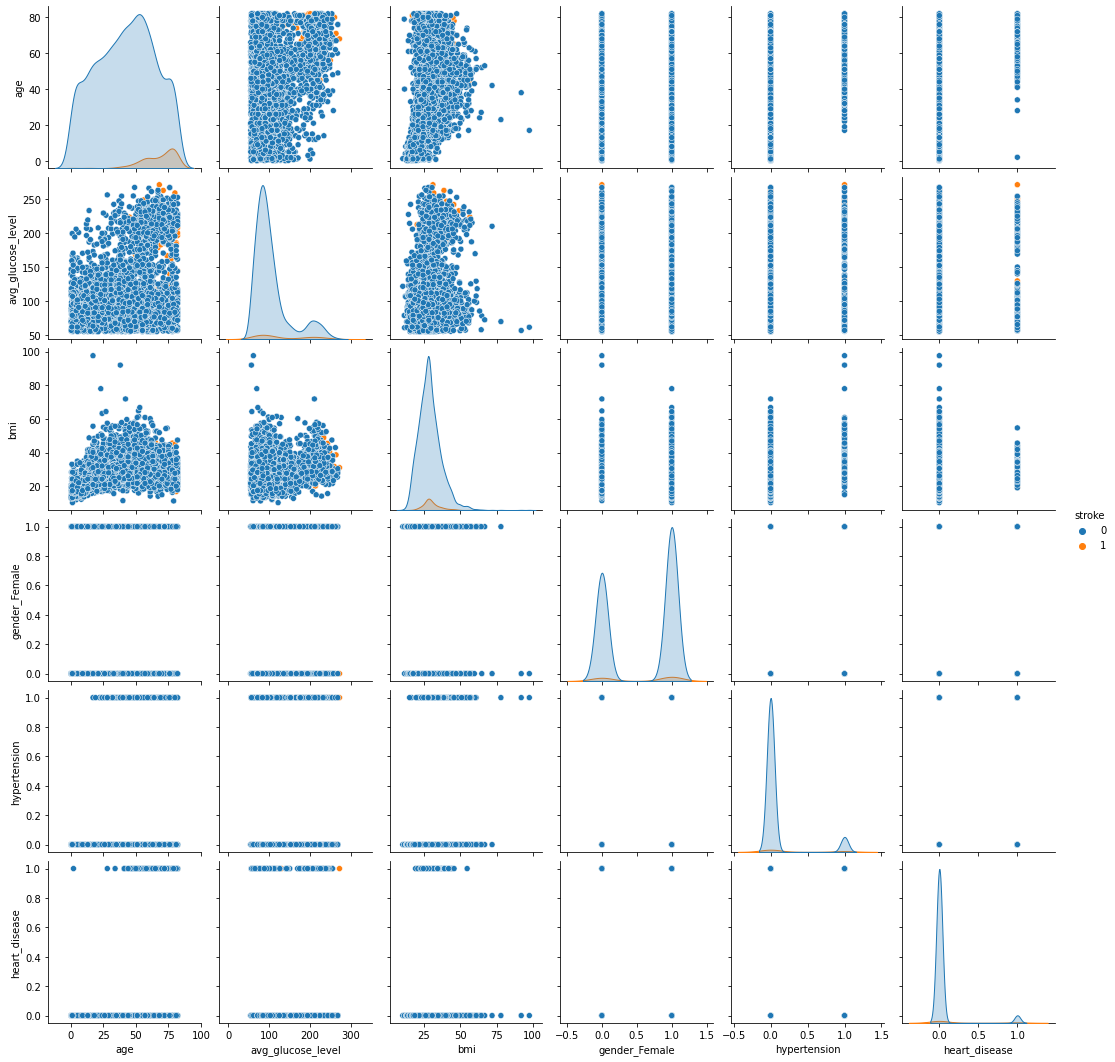

In [58]:
sns.pairplot(s_dataframe2_1hot.loc[:,["age",'avg_glucose_level','bmi','stroke','gender_Female','hypertension','heart_disease']],
             hue="stroke")
plt.show()

Based on the graphs above, patients with stroke are overlapping with patients without stroke which indicates that they are not clearly separated.

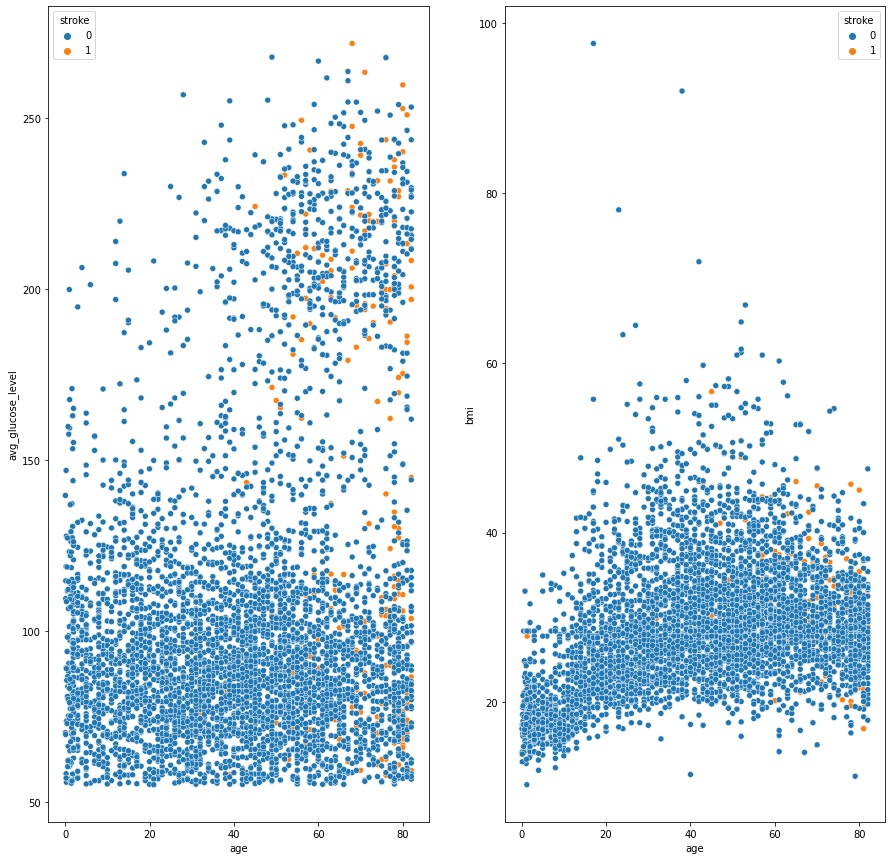

In [52]:
fig,ax=plt.subplots(1,2,figsize=(15,15))
sns.scatterplot(data=s_dataframe2_1hot,x='age',y='avg_glucose_level',hue='stroke',ax=ax[0])
sns.scatterplot(data=s_dataframe2_1hot,x='age',y='bmi',hue='stroke',ax=ax[1])
plt.show()

If looking at the scatterplot between age with avg_glucose_level and age with bmi, patients with stroke are tend to be older while their avg_glucose_level and bmi are similar with patients without stroke. Therefore, the best models to classify the classes are:

logistic regression: can use a probabilistic formula to create a non-linear boundary
decision tree: create multiple orthogonal boundaries for classification through data partitioning

# **Feature Importance Ranking Using Deviance (Logistic Regression) & Random Forest Classifier**
Feature ranking is required to determine the ordering of the features and best set of the features to be used in the model. There are 2 methods to be used:

1. >*deviance ranking*: generate deviance for each feature to determine the goodness of fit using probablistic model. The lower the deviance, the better the goodness-of-fit. However, the deviance ranking is only looking at a single independent variable at a time.
>
2. >*importance ranking using random forest*: random forest can generate multiple decision trees and the features can be ranked based on how many trees have used these features to classify the instances with the smallest impurity based on gini index or the smallest classification error.



In [53]:
def deviance(X, y, model):
    return 2*log_loss(y, model.predict_proba(X), normalize=False)
cls_weight=dict(s_dataframe2_y.value_counts(normalize=True))

In [54]:
deviance_list=[]

for i in s_dataframe2_x_1hot.columns:
    deviance_clf=LogReg(random_state=48,class_weight=cls_weight)
    deviance_clf.fit(np.array(s_dataframe2_x_1hot[i]).reshape(-1,1),s_dataframe2_y)
    deviance_temp=deviance(np.array(s_dataframe2_x_1hot[i]).reshape(-1,1),s_dataframe2_y,deviance_clf)
    deviance_list.append(deviance_temp)
    
deviance_df=pd.DataFrame(zip(s_dataframe2_x_1hot.columns,deviance_list))
deviance_df.columns=["variables","residual_deviance"]
deviance_df.sort_values(by="residual_deviance",inplace=True)

A for loop is created to use each single independent variable for logistic regression modelling to determine the residual deviance as a measure of goodness-of-fit.

In [55]:
feature_ranking_rf = rf_classifier(n_estimators=500,max_features="auto",max_depth=4, 
                                   random_state=48,class_weight=cls_weight)
feature_ranking_rf.fit(s_dataframe2_x_1hot,s_dataframe2_y)
feature_ranking_df=pd.DataFrame(zip(s_dataframe2_x_1hot.columns,
                                    feature_ranking_rf.feature_importances_))
feature_ranking_df.columns=["variables","feature_impt_score"]
feature_ranking_df.sort_values(by="feature_impt_score",inplace=True,ascending=False)

Random forest classifier with 500 trees and maximum depth of 4 is used to calculate the feature importance.

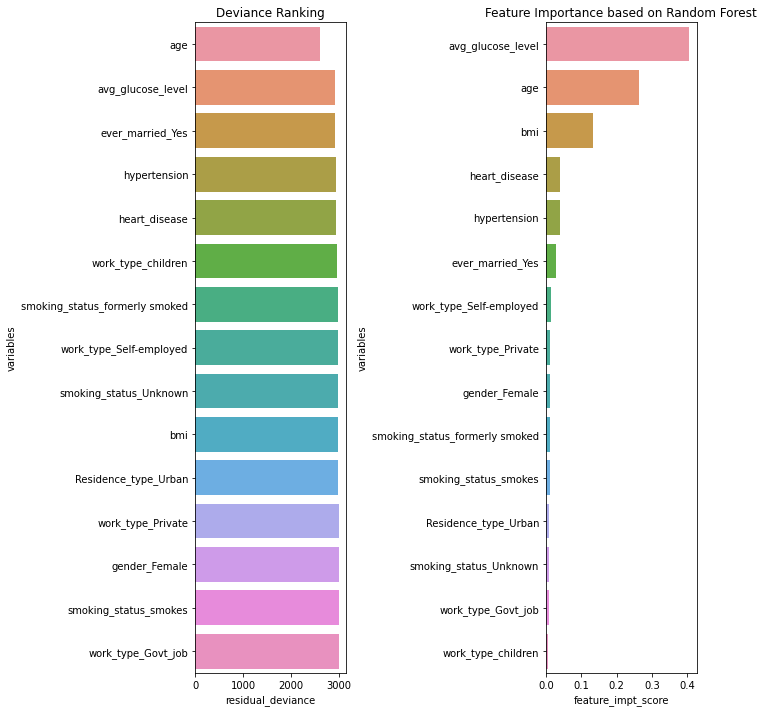

In [56]:
fig,ax=plt.subplots(1,2,figsize=(10,10))
sns.barplot(y="variables",x="residual_deviance",data=deviance_df,ax=ax[0]).\
set_title("Deviance Ranking")
sns.barplot(y="variables",x="feature_impt_score",data=feature_ranking_df,ax=ax[1]).\
set_title("Feature Importance based on Random Forest")
plt.tight_layout()
plt.show()

Looking at the graph above, deviance ranking shows that age, avg_glucose_level, ever_married, hypertension and heart disease are the top 5 variables that can explain the likelihood of getting a stroke while feature importance ranking using random forest indicates that bmi is better in explaining the likelihood of getting a stroke compared to ever_married.

These two rankings will be used in logistic regression and decision tree to determine which rankings are more suitable for each model based on classification error and F1 score.

# **Applying SMOTE to Address Class Imbalance**
Due to imbalance class size, **SMOTE** (Synthetic Minority Oversampling Technique) algorithm is used to generate additional samples for minority class using k-nearest neighbour method. You can read more about SMOTE from this link: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/.

In [59]:
smote=SMOTE(random_state=48)

x_smote,y_smote=smote.fit_resample(s_dataframe2_x_1hot,s_dataframe2_y)

print(x_smote.shape)
print(x_smote.shape[0]-s_dataframe2_x_1hot.shape[0])

(9720, 15)
4611


Using SMOTE, additional 4611 instances are generated as patients with stroke. To generate repoducible result, seed no 48 is used.

In [60]:
stroke_smote=x_smote.copy()
stroke_smote["stroke"]=y_smote.copy()

A dataframe for SMOTE generated data is created for data visualisation purpose.

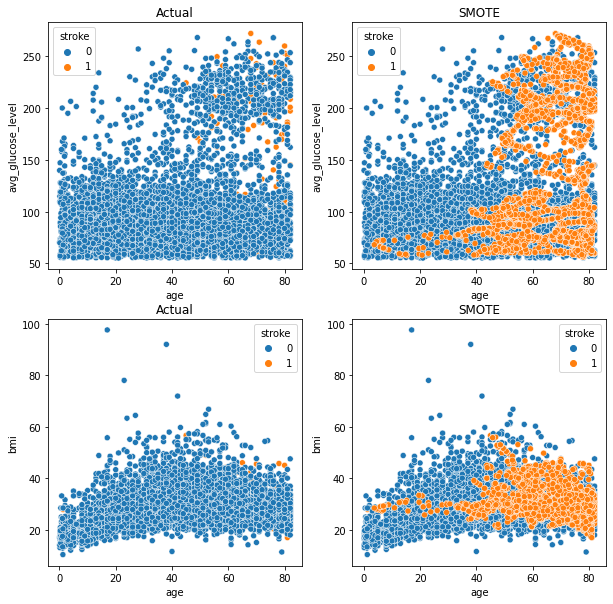

In [61]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
sns.scatterplot(data=s_dataframe2_1hot,x='age',y='avg_glucose_level',hue='stroke',ax=ax[0,0])\
.set_title("Actual")
sns.scatterplot(data=stroke_smote,x='age',y='avg_glucose_level',hue='stroke',ax=ax[0,1])\
.set_title("SMOTE")
sns.scatterplot(data=s_dataframe2_1hot,x='age',y='bmi',hue='stroke',ax=ax[1,0])\
.set_title("Actual")
sns.scatterplot(data=stroke_smote,x='age',y='bmi',hue='stroke',ax=ax[1,1])\
.set_title("SMOTE")
plt.show()

Looking at the graphs above, SMOTE manages to generate synthetic data according to the distribution of the original samples. Based on the generated synthetic data, patients with stroke are people aged 40 and above and a smaller number of patients below 40 have strokes.

In [62]:
stroke_smote.loc[stroke_smote.stroke==1].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_smokes,stroke
count,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.0
mean,68.166531,0.084979,0.051029,134.797317,29.841214,0.338683,0.794856,0.020370,0.392181,0.077572,0.002469,0.316049,0.049177,0.082510,0.046914,1.0
std,11.800826,0.278880,0.220079,62.516135,5.021723,0.473311,0.403848,0.141278,0.488287,0.267524,0.049634,0.464980,0.216260,0.275169,0.211476,0.0
min,1.320000,0.000000,0.000000,56.110000,16.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,59.134664,0.000000,0.000000,79.920750,27.193944,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,71.700632,0.000000,0.000000,107.479654,28.503890,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,78.088611,0.000000,0.000000,199.505169,31.826733,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0
max,82.000000,1.000000,1.000000,271.740000,56.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [63]:
s_dataframe2_1hot.loc[s_dataframe2_1hot.stroke==1].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_smokes,stroke
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.0
mean,67.728193,0.265060,0.188755,132.544739,30.087952,0.566265,0.883534,0.132530,0.598394,0.261044,0.008032,0.542169,0.188755,0.281124,0.168675,1.0
std,12.727419,0.442254,0.392102,61.921056,5.863936,0.496588,0.321429,0.339749,0.491210,0.440089,0.089441,0.499222,0.392102,0.450454,0.375219,0.0
min,1.320000,0.000000,0.000000,56.110000,16.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,59.000000,0.000000,0.000000,79.790000,27.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,71.000000,0.000000,0.000000,105.220000,28.400000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0
75%,78.000000,1.000000,0.000000,196.710000,32.500000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.0
max,82.000000,1.000000,1.000000,271.740000,56.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


Comparing the summary tables above, the data distribution among the patients with stroke is similar to the original dataset.

# **Logistic Regression**
SMOTE dataset will be used to train and test logistic regression and decision tree. Before starting the model fitting, data splitting is done to prepare train and test sets with a ratio of 80:20. Seed number 48 is used to reproduce the data split.

In [64]:
x_smote_train,x_smote_test,y_smote_train,y_smote_test=\
train_test_split(x_smote,y_smote,test_size=0.20,random_state=48)

In [65]:
def log_reg_cv(train_X,train_Y,feature_list):
    f1_list_train=[]
    f1_list_test=[]
    acc_list_train=[]
    acc_list_test=[]
    for i in range(1,len(feature_list)+1):
        cv_results_temp = cross_validate(LogReg(random_state=48,solver='liblinear',penalty="l1"),
                                         train_X.loc[:,feature_list[:i]],train_Y, 
                            cv=5,scoring=["accuracy","f1"],return_train_score=True)
        mean_acc_train=np.mean(cv_results_temp["train_accuracy"])
        mean_f1_train=np.mean(cv_results_temp["train_f1"])
        mean_acc_test=np.mean(cv_results_temp["test_accuracy"])
        mean_f1_test=np.mean(cv_results_temp["test_f1"])
        f1_list_train.append(mean_f1_train)
        acc_list_train.append(mean_acc_train)
        f1_list_test.append(mean_f1_test)
        acc_list_test.append(mean_acc_test)
    cv_scoring_df=pd.DataFrame(zip(f1_list_train,f1_list_test,acc_list_train,acc_list_test))
    cv_scoring_df.columns=["Mean F1 Train","Mean F1 Test","Mean Accuracy Train","Mean Accuracy Test"]
    cv_scoring_df.index=cv_scoring_df.index+1
    return cv_scoring_df

A for loop is used for forward selection to determine the number of features to be used using a logistic regression with L1 penalty, a LASSO logistic regression. 2 dataframes will be generated to determine which feature ranking is more suitable for the model based on F1 and accuracy scores.

In [66]:
logreg_cv_scoring_df=log_reg_cv(x_smote_train,y_smote_train,deviance_df.variables)
logreg_cv_scoring_df

,Mean F1 Train,Mean F1 Test,Mean Accuracy Train,Mean Accuracy Test
1,0.774362,0.774945,0.765143,0.765688
2,0.776160,0.775836,0.767200,0.766847
3,0.779217,0.778964,0.772537,0.772377
4,0.787539,0.787447,0.781154,0.781122
5,0.789152,0.788007,0.783533,0.782408
6,0.789693,0.789016,0.784015,0.783180
7,0.792175,0.791131,0.787905,0.786907
8,0.812637,0.812471,0.808738,0.808512
9,0.826383,0.826336,0.823302,0.823174
10,0.826271,0.826235,0.823206,0.823045


In [67]:
logreg_cv_scoring_df2=log_reg_cv(x_smote_train,y_smote_train,feature_ranking_df.variables)
logreg_cv_scoring_df2

,Mean F1 Train,Mean F1 Test,Mean Accuracy Train,Mean Accuracy Test
1,0.516340,0.516462,0.599473,0.599924
2,0.776315,0.776035,0.767297,0.766975
3,0.774599,0.773813,0.766075,0.765433
4,0.775179,0.774325,0.767747,0.766847
5,0.784018,0.783312,0.776492,0.775720
6,0.789366,0.789115,0.783726,0.783308
7,0.800781,0.799923,0.796361,0.795395
8,0.828489,0.827669,0.824653,0.823817
9,0.834923,0.834368,0.832337,0.831919
10,0.843254,0.841148,0.840889,0.838992


Based on the dataframes above, feature ranking using random forest has slightly better F1 and accuracy scores compared to deviance ranking as random forest's feature importance ranking has taken the multivariate effect into account when doing model fitting.

In [68]:
log_reg_final=LogReg(random_state=48,solver='liblinear',penalty='l1')
log_reg_final.fit(x_smote_train.loc[:,feature_ranking_df.variables],y_smote_train)
y_smote_train_pred=log_reg_final.predict(x_smote_train.loc[:,feature_ranking_df.variables])
y_smote_test_pred=log_reg_final.predict(x_smote_test.loc[:,feature_ranking_df.variables])

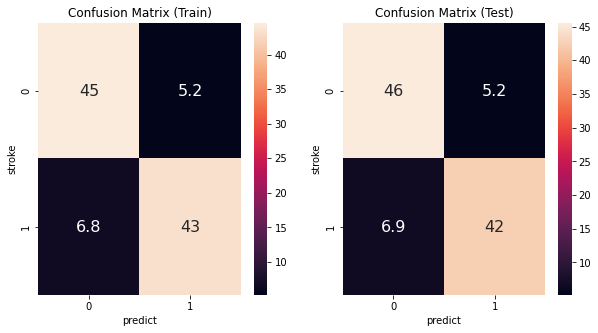

In [69]:
cf_train=pd.DataFrame(
    pd.crosstab(y_smote_train,y_smote_train_pred,normalize=True,colnames=["predict"])*100)
cf_test=pd.DataFrame(
    pd.crosstab(y_smote_test,y_smote_test_pred,normalize=True,colnames=["predict"])*100)
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.heatmap(cf_train,annot=True, annot_kws={"size": 16},ax=ax[0]).set_title("Confusion Matrix (Train)")
sns.heatmap(cf_test,annot=True, annot_kws={"size": 16},ax=ax[1]).set_title("Confusion Matrix (Test)")
plt.show()

Looking at the confusion matrices, there is no overfitting or underfitting issue.

In [70]:
train_log_reg_f1=round(f1_score(y_smote_train,y_smote_train_pred)*100,2)
test_log_reg_f1=round(f1_score(y_smote_test,y_smote_test_pred)*100,2)

print("F1 Score for train:",train_log_reg_f1)
print("F1 Score for test:",test_log_reg_f1)

F1 Score for train: 87.84
F1 Score for test: 87.52


F1 scores for train and test are around 87 which are considered quite good.

In [71]:
coef_exp=np.exp(log_reg_final.coef_[0])
coef_exp_df=pd.DataFrame(zip(feature_ranking_df.variables,coef_exp))
coef_exp_df.columns=["Variables","Coef (Exp)"]
coef_exp_df.loc[15]=["intercept",np.exp(log_reg_final.intercept_[0])]
coef_exp_df

,Variables,Coef (Exp)
0,avg_glucose_level,1.005815
1,age,1.100145
2,bmi,1.018121
3,heart_disease,0.323312
4,hypertension,0.437892
5,ever_married_Yes,0.544334
6,work_type_Self-employed,0.002293
7,work_type_Private,0.008056
8,gender_Female,0.332729
9,smoking_status_formerly smoked,0.190535


Based on the intercept, a patient has a base probability of 46% to get a stroke.

Looking at the coefficient table above, average glucose level, age and bmi are more likely to cause stroke as:

1. 1 unit increases in average glucose level, the likelihood of getting a stroke is increased by 1.006 times.
2. 1 unit increases in age, the likelihood of getting a stroke is increased by 1.1 times.
3. 1 unit increases in bmi, the likelihood of getting a stroke is increased by 1.02 times.

While other variables showed less likely to get a stroke.

# **Decision Tree**
In this section, we will look at the performance of decision tree. Before that, grid search is used to find the best hyperparameters for decision tree. Since decision tree is easily overfitting, the decision tree is limited to a maximum depth of 4 with maximum number of features of 5.

In [72]:
dtree_parameters={'max_depth':[3,4],'max_features':[2,3,4,5],'min_samples_leaf':[5,10,20,30],
                  'min_samples_split':[5,10,20,30]}
dtree=dtree_clf(random_state=48)
dtree_gridsearch=gridCV(dtree,dtree_parameters,scoring="f1",verbose=1)
dtree_gridsearch.fit(x_smote_train,y_smote_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=48),
             param_grid={'max_depth': [3, 4], 'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [5, 10, 20, 30],
                         'min_samples_split': [5, 10, 20, 30]},
             scoring='f1', verbose=1)

In [73]:
dtree_gridsearch.best_params_

{'max_depth': 4,
 'max_features': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 5}

Based on the result of the grid search, a decision tree with a maximum depth of 4 and maximum features of 5 along with minimum sample split at 5 and each leaf has a minimum sample of 10.

In [74]:
def dtree_cv(train_X,train_Y,feature_list,n):
    f1_list_train=[]
    f1_list_test=[]
    acc_list_train=[]
    acc_list_test=[]
    cv_results_temp = cross_validate(dtree_clf(max_depth=4,max_features=5,min_samples_leaf=10,
                                               min_samples_split=5,
                                                   random_state=48),
                                         train_X.loc[:,feature_list[:n]],train_Y, 
                            cv=5,scoring=["accuracy","f1"],return_train_score=True)
    mean_acc_train=np.mean(cv_results_temp["train_accuracy"])
    mean_f1_train=np.mean(cv_results_temp["train_f1"])
    mean_acc_test=np.mean(cv_results_temp["test_accuracy"])
    mean_f1_test=np.mean(cv_results_temp["test_f1"])
    f1_list_train.append(mean_f1_train)
    acc_list_train.append(mean_acc_train)
    f1_list_test.append(mean_f1_test)
    acc_list_test.append(mean_acc_test)
    cv_scoring_df=pd.DataFrame(zip(f1_list_train,f1_list_test,acc_list_train,acc_list_test))
    cv_scoring_df.columns=["Mean F1 Train","Mean F1 Test","Mean Accuracy Train",
                               "Mean Accuracy Test"]
    return cv_scoring_df

A for loop is created to do cross validation on decision tree using top 5 features.

In [75]:
dtree_cv_scoring_df=dtree_cv(x_smote_train,y_smote_train,deviance_df.variables,5)
dtree_cv_scoring_df

,Mean F1 Train,Mean F1 Test,Mean Accuracy Train,Mean Accuracy Test
0,0.791446,0.779831,0.793403,0.782537


In [76]:
dtree_cv_scoring_df2=dtree_cv(x_smote_train,y_smote_train,feature_ranking_df.variables,5)
dtree_cv_scoring_df2

,Mean F1 Train,Mean F1 Test,Mean Accuracy Train,Mean Accuracy Test
0,0.81642,0.808537,0.798,0.789482


Looking at the two dataframes above, the top 5 features in feature importance ranking are better. But compared to logistic regression, the performance is weaker.

In [77]:
dtree_final=dtree_clf(max_depth=4,max_features=5,min_samples_leaf=10,min_samples_split=5,
                      random_state=48)
dtree_final.fit(x_smote_train.loc[:,feature_ranking_df.variables[:5]],y_smote_train)
y_smote_train_dt_pred=dtree_final.predict(x_smote_train.loc[:,feature_ranking_df.variables[:5]])
y_smote_test_dt_pred=dtree_final.predict(x_smote_test.loc[:,feature_ranking_df.variables[:5]])

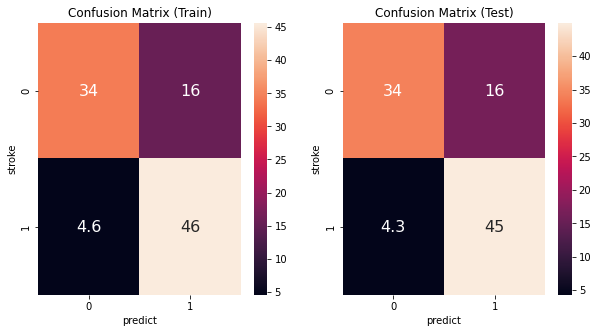

In [78]:
cf_dt_train=pd.DataFrame(
    pd.crosstab(y_smote_train,y_smote_train_dt_pred,normalize=True,colnames=["predict"])*100)
cf_dt_test=pd.DataFrame(
    pd.crosstab(y_smote_test,y_smote_test_dt_pred,normalize=True,colnames=["predict"])*100)
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.heatmap(cf_dt_train,annot=True, annot_kws={"size": 16},ax=ax[0]).set_title("Confusion Matrix (Train)")
sns.heatmap(cf_dt_test,annot=True, annot_kws={"size": 16},ax=ax[1]).set_title("Confusion Matrix (Test)")
plt.show()

Looking at the confusion matrices, decision tree is more likely to get false positive as 16% are identified as stroke despite they actually did not have stroke.

In [79]:
train_dt_f1=round(f1_score(y_smote_train,y_smote_train_dt_pred)*100,2)
test_dt_f1=round(f1_score(y_smote_test,y_smote_test_dt_pred)*100,2)
print("F1 Score for train:",train_dt_f1)
print("F1 Score for test:",test_dt_f1)

F1 Score for train: 81.95
F1 Score for test: 81.26


F1 scores for decision tree are close to 82 which are lower than 87 for logistic regression.

In [80]:
dtree_final_txt=tree.export_text(dtree_final,feature_names=list(feature_ranking_df.variables[:5]))
print(dtree_final_txt)

|--- age <= 49.01
|   |--- age <= 38.04
|   |   |--- avg_glucose_level <= 82.29
|   |   |   |--- bmi <= 26.59
|   |   |   |   |--- class: 0
|   |   |   |--- bmi >  26.59
|   |   |   |   |--- class: 0
|   |   |--- avg_glucose_level >  82.29
|   |   |   |--- age <= 37.50
|   |   |   |   |--- class: 0
|   |   |   |--- age >  37.50
|   |   |   |   |--- class: 0
|   |--- age >  38.04
|   |   |--- age <= 38.99
|   |   |   |--- class: 1
|   |   |--- age >  38.99
|   |   |   |--- bmi <= 25.20
|   |   |   |   |--- class: 0
|   |   |   |--- bmi >  25.20
|   |   |   |   |--- class: 0
|--- age >  49.01
|   |--- age <= 67.00
|   |   |--- bmi <= 26.91
|   |   |   |--- age <= 58.04
|   |   |   |   |--- class: 0
|   |   |   |--- age >  58.04
|   |   |   |   |--- class: 0
|   |   |--- bmi >  26.91
|   |   |   |--- avg_glucose_level <= 100.54
|   |   |   |   |--- class: 1
|   |   |   |--- avg_glucose_level >  100.54
|   |   |   |   |--- class: 1
|   |--- age >  67.00
|   |   |--- heart_disease <= 0.50
|

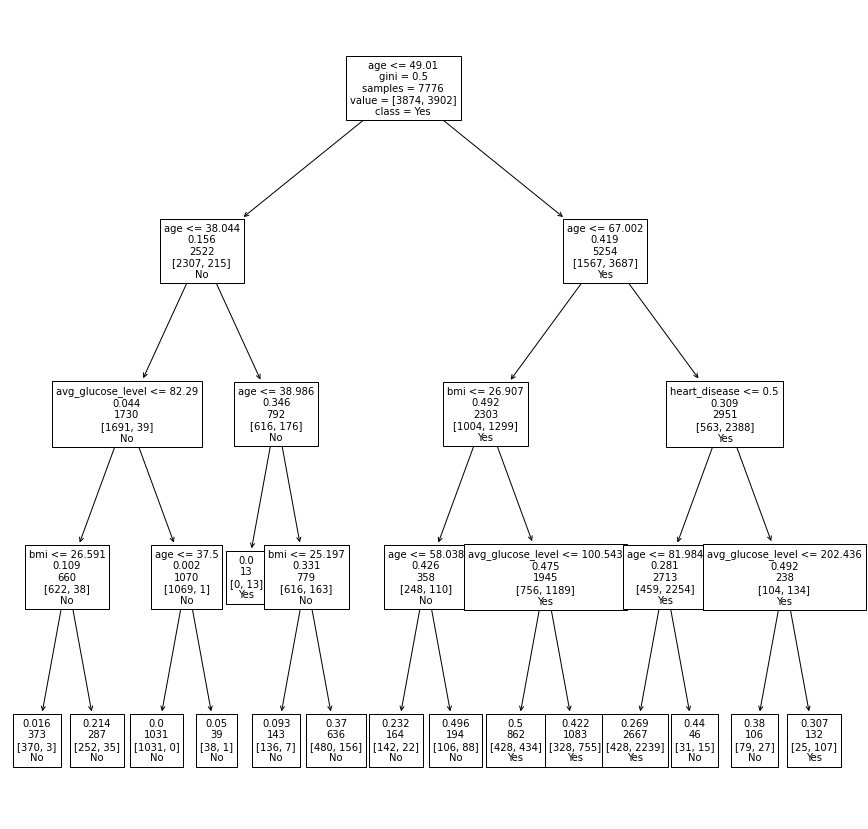

In [81]:
plt.figure(figsize=(15,15))
tree.plot_tree(dtree_final,fontsize=10,feature_names=list(feature_ranking_df.variables[:5]),
              class_names={0:'No',1:'Yes'},label="root")
plt.show()

Based on the chart above, people with stroke are people with

1. age less than 67 but more than 49.01 and a bmi higher than 26.91
age more than 67 but less than 82 and with a probability of heart disease less than or equal to 0.5
2. age more than 67 with a probability of heart disease more than 0.5 and average glucose level higher than 202.4
3. age smaller or equal to 38.9 but more than 38.

# **Ensemble Learning - Adaboost**
In this segment, we did classification using Adaboost classifier. Adaboost uses multiple decision trees and all the independent features to do classification. Following which, Adaboost uses multiple weak classifiers to classify the instances and adjust the classifiers by putting heavier weights on misclassified instances to classify them on the next classifier. Thus, helping reduce the misclassification error.

In [82]:
adaboost_parameters={'learning_rate':[0.2,0.4,0.8,1.0]}
adb_clf=adaboost_clf(dtree_clf(max_depth=3),n_estimators=100,random_state=48)
adb_gridsearch=gridCV(adb_clf,adaboost_parameters,scoring="f1",verbose=1)
adb_gridsearch.fit(x_smote_train,y_smote_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                          n_estimators=100, random_state=48),
             param_grid={'learning_rate': [0.2, 0.4, 0.8, 1.0]}, scoring='f1',
             verbose=1)

To further improve the hyperparameter (learning rate) for Adaboost classifier, grid search is used. Our group then restricted Adaboost such that it is only able to build 100 decision trees with a depth of 3 for each. However, in order to replicate the same Adaboost model, seed no 48 is used.

In [83]:
adb_gridsearch.best_params_

{'learning_rate': 0.2}

In [84]:
adb_clf_final=adaboost_clf(dtree_clf(max_depth=3),random_state=48,
                           n_estimators=100,learning_rate=0.2)
adb_clf_final.fit(x_smote_train,y_smote_train)
y_smote_train_adb_pred=adb_clf_final.predict(x_smote_train)
y_smote_test_adb_pred=adb_clf_final.predict(x_smote_test)


Using searchgrid, it was found that the best learning rate is 0.2. Thus, our group proceeded to train Adaboost again using the train dataset before predicting the classes using train and test sets respectively. In order to evaluate the model performance of Adaboost, we will be comparing the actual classes in the train and test sets with the predicted classes.

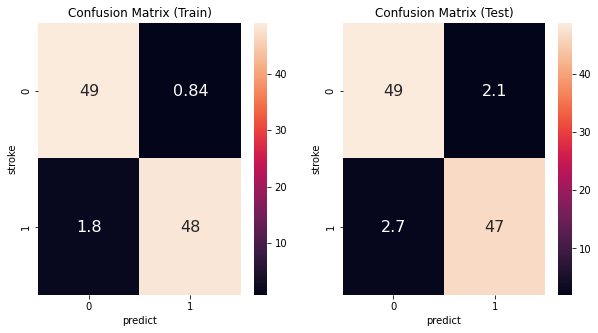

In [85]:
cf_adb_train=pd.DataFrame(
    pd.crosstab(y_smote_train,y_smote_train_adb_pred,normalize=True,colnames=["predict"])*100)
cf_adb_test=pd.DataFrame(
    pd.crosstab(y_smote_test,y_smote_test_adb_pred,normalize=True,colnames=["predict"])*100)
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.heatmap(cf_adb_train,annot=True, annot_kws={"size": 16},ax=ax[0]).set_title("Confusion Matrix (Train)")
sns.heatmap(cf_adb_test,annot=True, annot_kws={"size": 16},ax=ax[1]).set_title("Confusion Matrix (Test)")
plt.show()

In [86]:
train_adb_f1=round(f1_score(y_smote_train,y_smote_train_adb_pred)*100,2)
test_adb_f1=round(f1_score(y_smote_test,y_smote_test_adb_pred)*100,2)
print("F1 Score for train:",train_adb_f1)
print("F1 Score for test:",test_adb_f1)

F1 Score for train: 97.32
F1 Score for test: 95.17


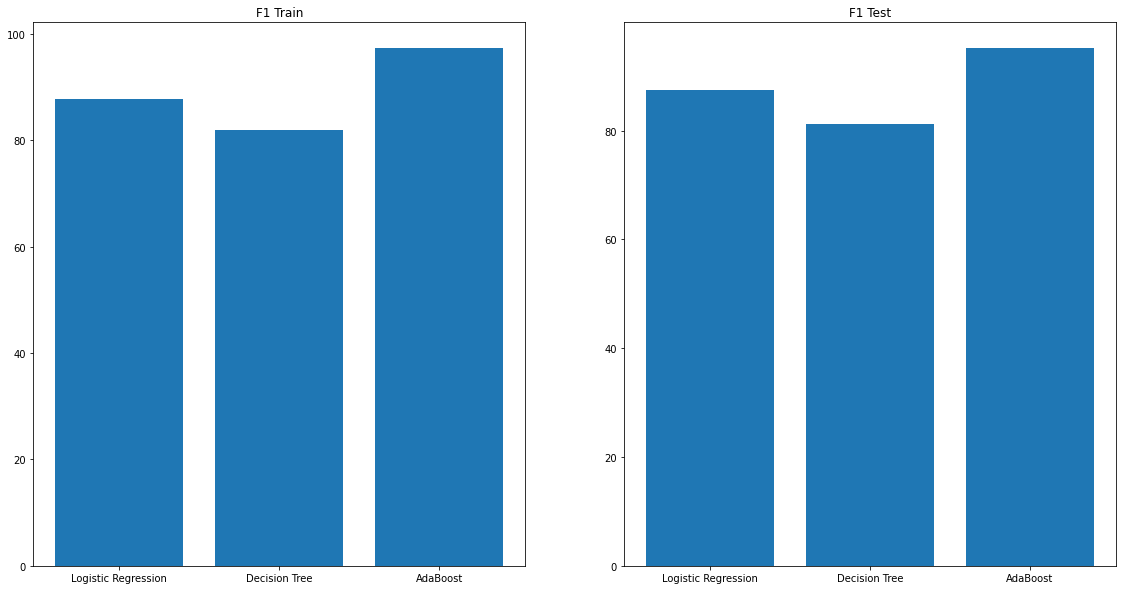

In [87]:
names = ['Logistic Regression','Decision Tree','AdaBoost']
values_train = [train_log_reg_f1, train_dt_f1, train_adb_f1]
values_test = [test_log_reg_f1, test_dt_f1, test_adb_f1]

plt.figure(figsize=(30, 10))

plt.subplot(131)
plt.bar(names, values_train)
plt.title('F1 Train')
plt.subplot(132)
plt.bar(names, values_test)
plt.title('F1 Test')
plt.show()


Although the confusion matrix shows that the performances in train and test are at par in general, the F1 scores above indicate a slightly overfitting issue but has values higher than both logistic regression and decision tree.

Our group have plotted out the F1 scores for different models. Clearly, Decision tree proves to be the worst model out of the three. Adaboost has the highest F1 score for both train and test set. Since, F1 score only reaches its optimum value of 1 only if precision and recall are both at 100%, AdaBoost reflects as the best classifier. 

## **3. Conclusion**

By comparing the performances of the 3 models, although Adaboost has the best performance given its highest F1 score in test set, it does not provide a clear interpretation on how the features affect the likelihood of a patient getting stroke. To get a clearer interpretation, logistic regression is chosen. Logistic regression quantifies the effect of each feature to the likelihood of a patient getting a stroke and has better performance compared to decision tree.

Based on the findings from logistic regression stroke is mainly driven by age, bmi and average glucose level followed by heart disease. Higher in age, bmi and average glucose level can increase the likelihood of a patient getting stroke. Following which, it was found that heart disease reduces the likelihood of a patient getting stroke which is questionable as the patient can die from heart attack instead of getting a stroke. However, upon closer research, the risk of stroke is 3 to 4 times higher in the absence of organic heart disease(Arboix, 2015).

# **Citation**

Arboix A. (2015). Cardiovascular risk factors for acute stroke: Risk profiles in the different subtypes of ischemic stroke. World journal of clinical cases, 3(5), 418–429. https://doi.org/10.12998/wjcc.v3.i5.418